In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

sys.path.append("../code")
from utils import *

### Generate Data

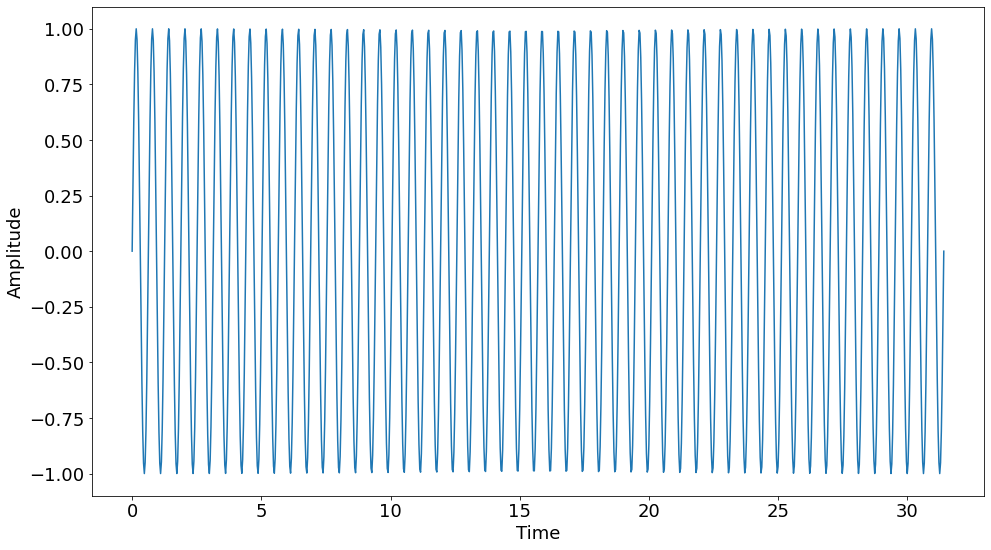

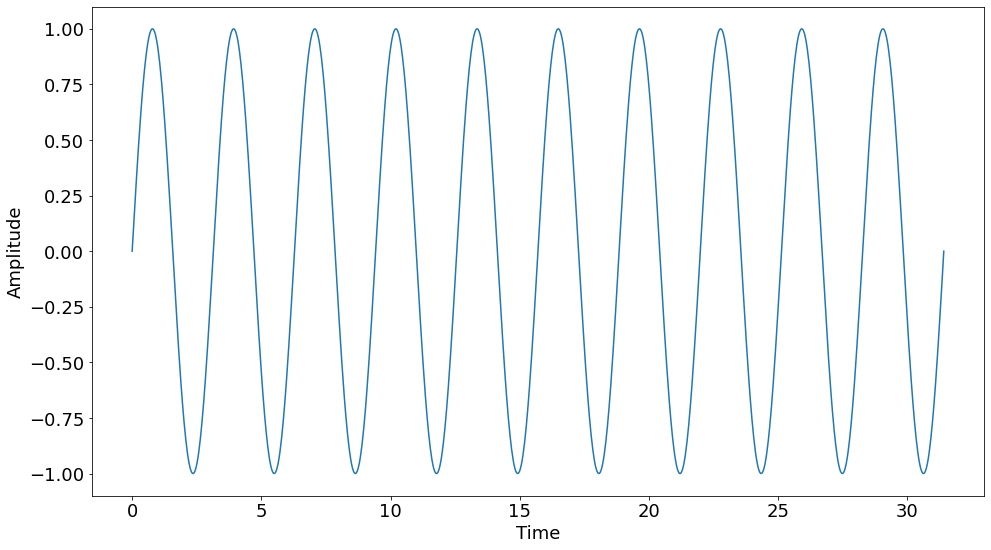

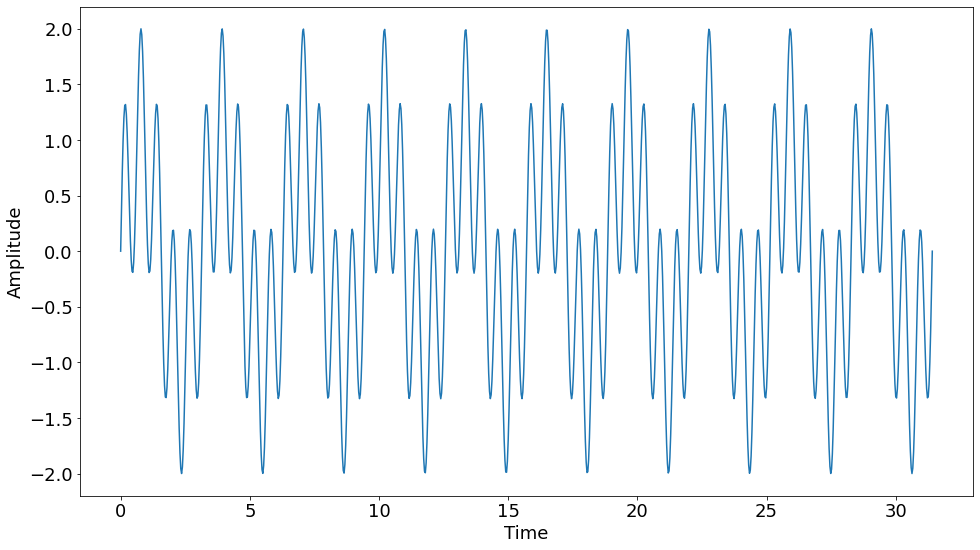

In [2]:
omega_1 = 10
omega_2 = 2
omega_3 = 1

x = np.linspace(0,10*np.pi,1000)                  # Start, End, samples between - Range of the analysis
A = pd.Series([np.sin(omega_1 * t) for t in x])   # Signal A
B = pd.Series([np.sin(omega_2 * t) for t in x])   # Signal B
C = omega_3 * (A + B)                             # Superposition of A and B

signals = [(A, omega_1), (B, omega_2), (C, omega_3)]
titles = ["A", "B", "C"]


# Plot the signals
for idx, (signal, omega) in enumerate(signals):
    plt.figure(figsize=(16,9))
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Amplitude", fontsize=18)
    plt.plot(x, signal)
    plt.show()

### Run Fractal Analysis and Create Richardson Plot

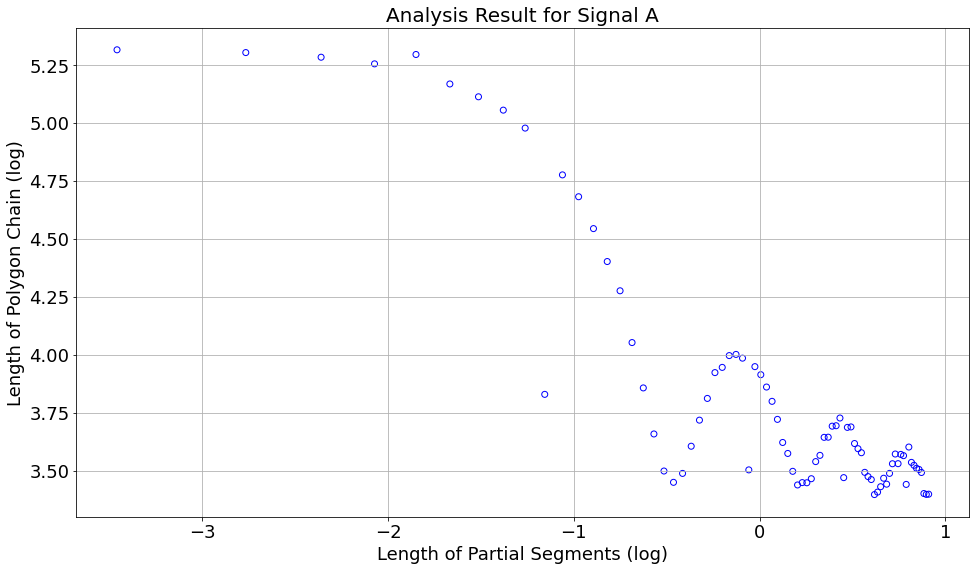

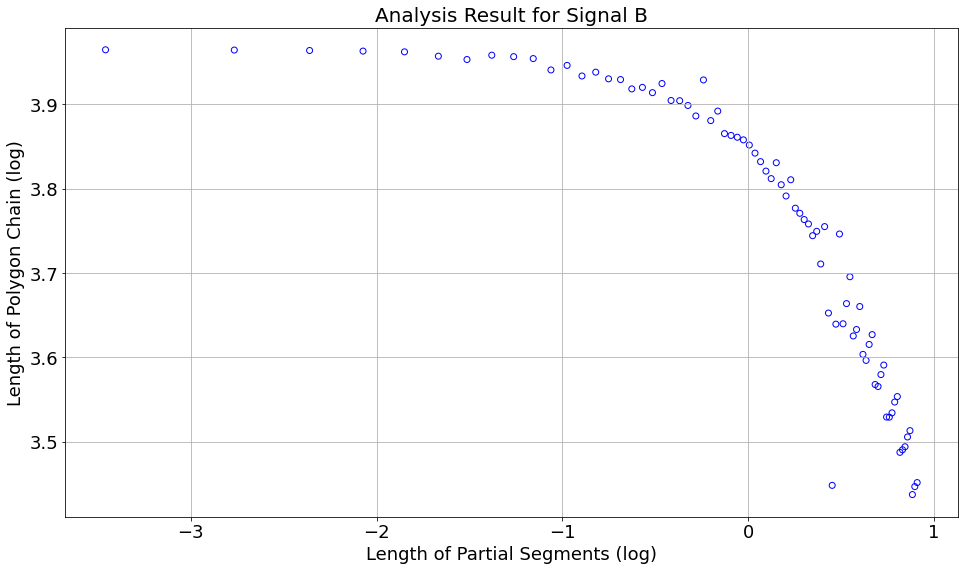

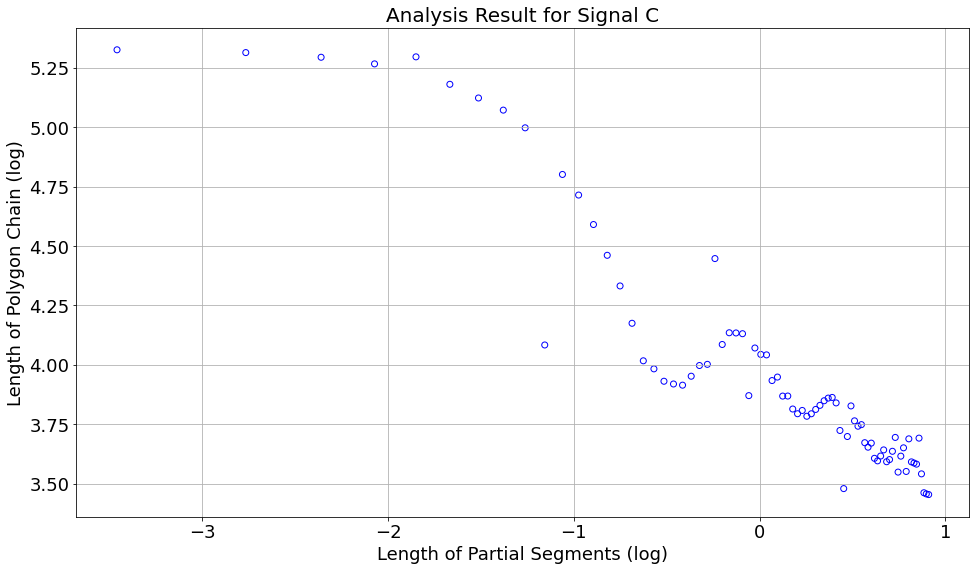

In [3]:
# Set divider widths
divider_widths = range(1,80,1) # Range of divider widths
analysises = []                # List that stores the analysis for each signal

for idx, (signal, omega) in enumerate(signals):
    
    # Richardson plot of range 
    analysis = [calculate_total_length(x, signal, i)  for i in divider_widths] # List with one fractal analysis for current signal
    analysises.append(analysis)                                               # Add result to global list of analyses
    divider_length, poly_length, reg_param = zip(*analysis)
    
    
    # Richardson plot
    plt.figure(figsize=(16,9))
    plt.title(f"Analysis Result for Signal {titles[idx]}", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Length of Partial Segments (log)", fontsize=18)
    plt.ylabel("Length of Polygon Chain (log)", fontsize=18)
    
    # Plot divider width on x-axis and polygon chain length on y-axis
    plt.scatter(np.log(divider_length), np.log(poly_length), label=f"Signal {titles[idx]}, Omega: {omega}", color="none", edgecolors="blue")
    plt.grid(True, which="both", ls="-")
    plt.show()

### Clean Output with Spline Interpolation

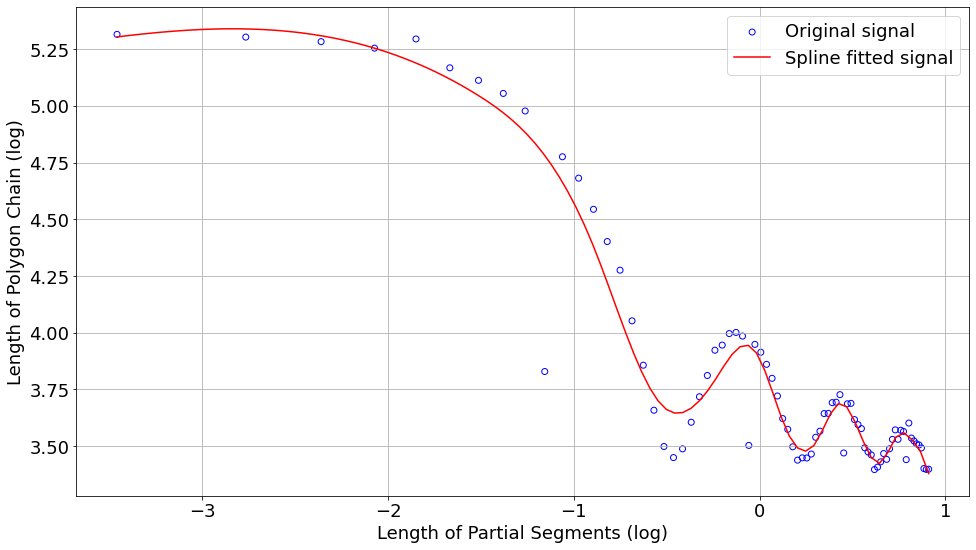

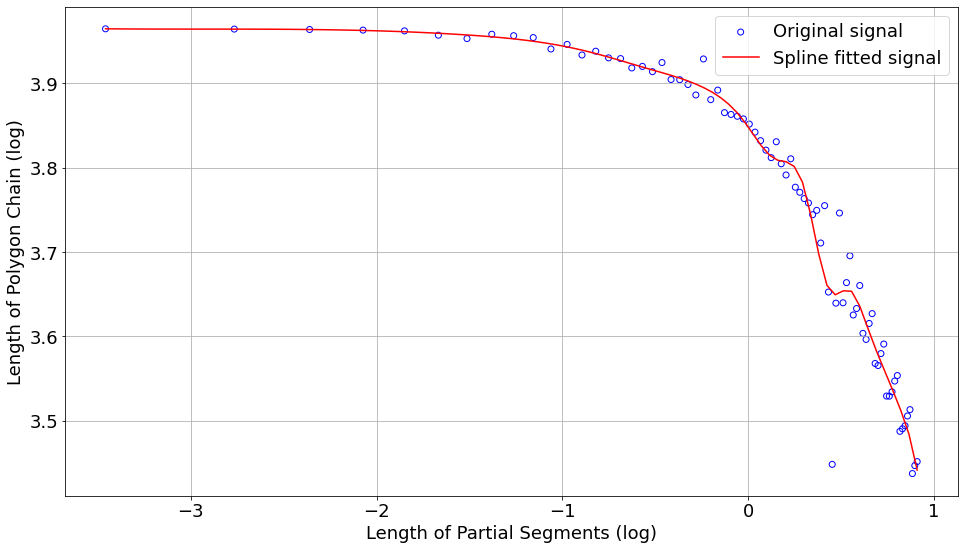

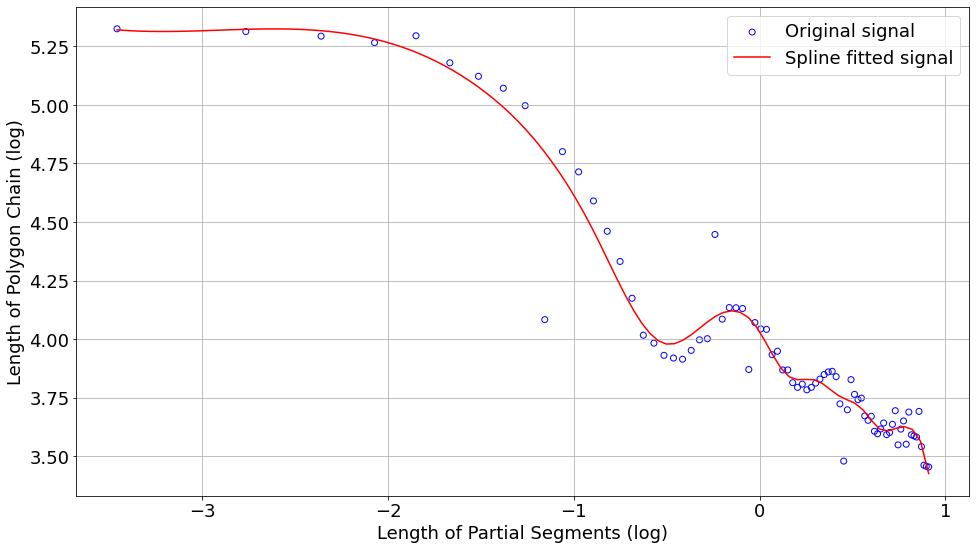

In [4]:
cleaned_analysises = []

# Iterate through our three analysises of A, B and C
for idx, analysis in enumerate(analysises):
    
    # Get results for the given analysis
    divider_length, poly_length, reg_param = zip(*analysis)
    
    # Spline interpolation
    new_x, new_y = spline_interpolate(divider_length, poly_length, 12)
    
    # Add result to global list of analyses
    cleaned_analysises.append((new_x, new_y))
    
    
    # Plot Result
    plt.figure(figsize=(16, 9))
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Length of Partial Segments (log)", fontsize=18)
    plt.ylabel("Length of Polygon Chain (log)", fontsize=18)
    # Scatter plot of the input before it is spline interpolated (LOG to suit the Richardson plot) 
    plt.scatter(np.log(divider_length), np.log(poly_length),  label="Original signal", color="none", edgecolors="blue")
    plt.plot(new_x, new_y, '-', c="r", label="Spline fitted signal")
    plt.legend(fontsize=18)
    plt.grid()
    plt.show() 

### Piecewise Regression and Calculate Fractal Dimensions

Fractal Analysis for Signal A:
    First Order Roughness: 1.228725248123084
    Second Order Roughness: 2.653982787647524
    


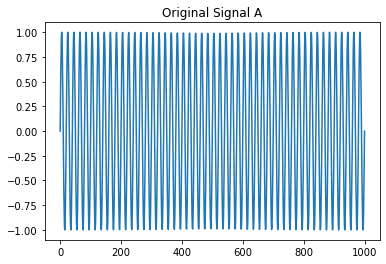

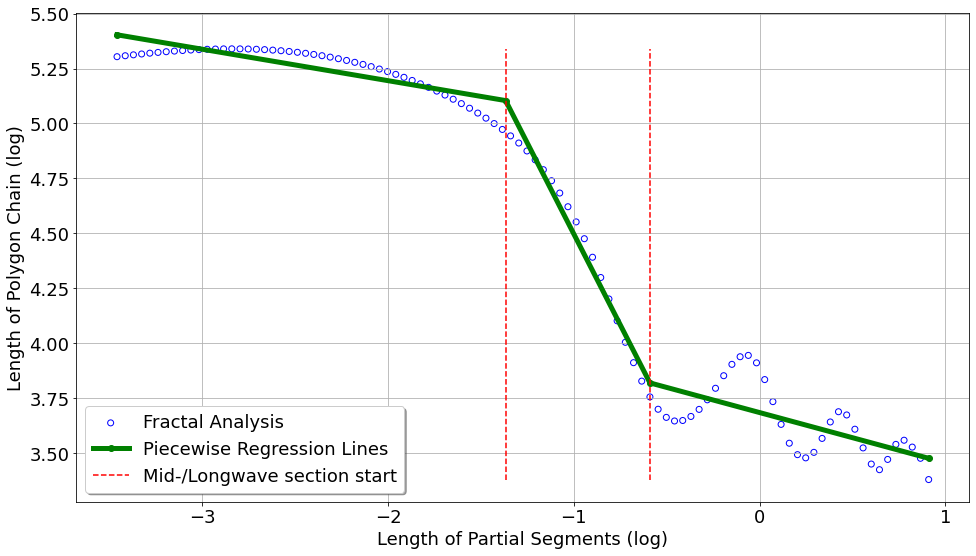

Fractal Analysis for Signal B:
    First Order Roughness: 1.4533751783172404
    Second Order Roughness: 1.0877368165068282
    


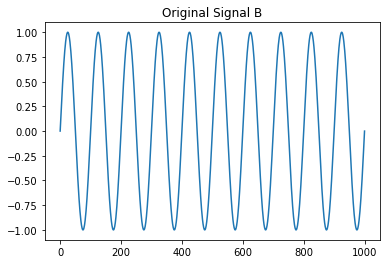

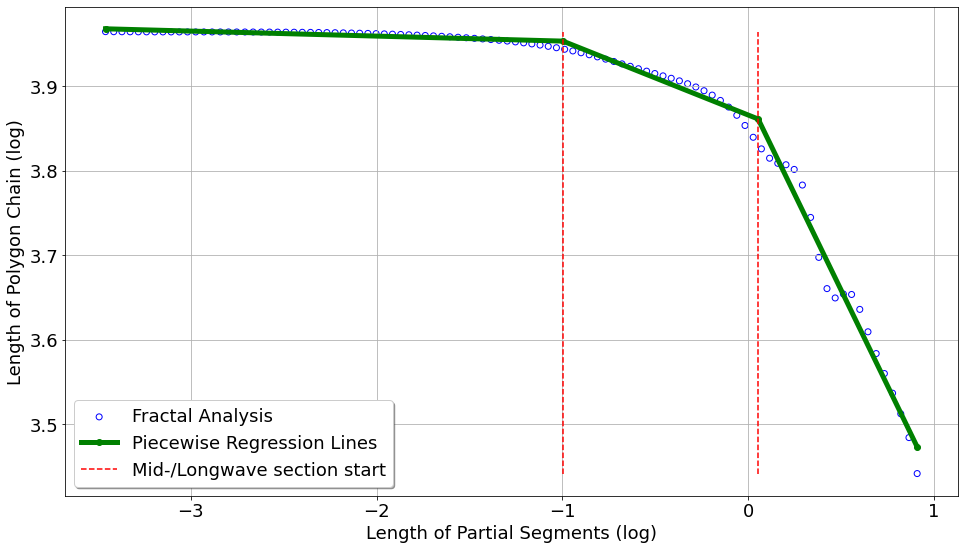

Fractal Analysis for Signal C:
    First Order Roughness: 1.3770260228007052
    Second Order Roughness: 2.1195031776757602
    


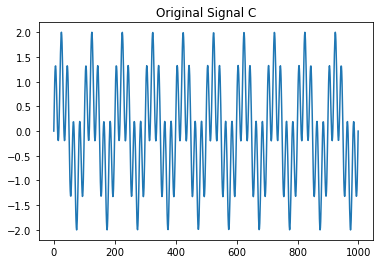

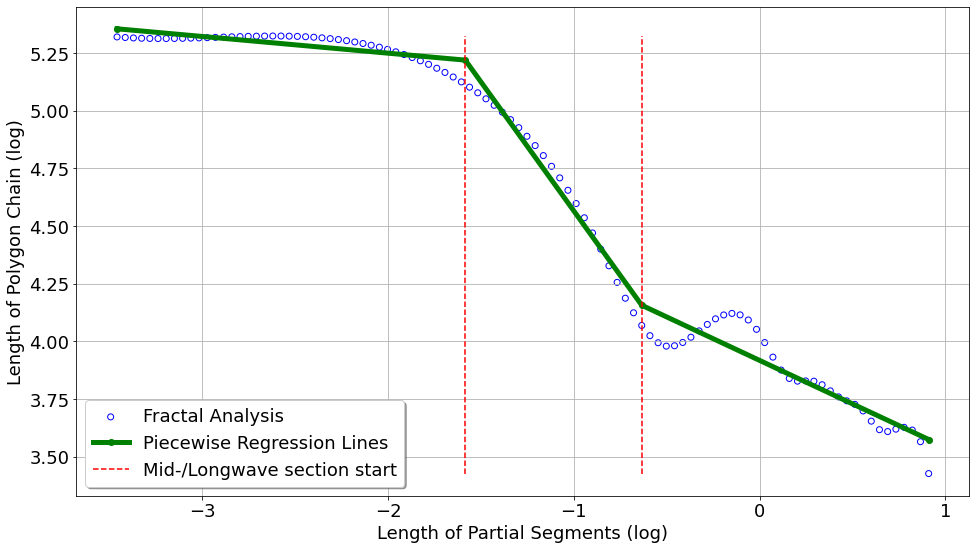

In [5]:
fractal_dimension = []

# Iterate through our three cleaned analysises of A, B and C
for idx, (lambda_, polygon_length) in enumerate(cleaned_analysises):
    
    # Piecewise Regression
    px, py = segments_fit(lambda_, polygon_length, 3)
    
    
    # Calculate fractal dimension (Dr = 1 - m)
    m1 = (py[3] - py[2])/(px[3] - px[2])
    m2 = (py[2] - py[1])/(px[2] - px[1]) 
    Dr1 = 1 - m1 # Measure on 1. order roughness
    Dr2 = 1 - m2 # Measure on 2. order roughness
    
    # Store the fractal dimensions
    fractal_dimension.append((Dr1, Dr2))
    
    print(f"""Fractal Analysis for Signal {titles[idx]}:
    First Order Roughness: {Dr1}
    Second Order Roughness: {Dr2}
    """)
    
    # Plot input signal
    plt.figure()
    plt.title(f"Original Signal {titles[idx]}")
    plt.plot(signals[idx][0])
    plt.show()
    
    # Plot final analysis
    plt.figure(figsize=(16,9))
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.scatter(lambda_, polygon_length, label="Fractal Analysis", color="none", edgecolor="blue")
    plt.plot(px, py, "-og", label="Piecewise Regression Lines", linewidth=5);
    
    # Vertical lines at point second and third breakpoint
    plt.vlines(px[1], min(polygon_length), max(polygon_length), colors=('r'), linestyles=('dashed'), label="Mid-/Longwave section start")
    plt.vlines(px[2], min(polygon_length), max(polygon_length), colors=('r'), linestyles=('dashed'))
    
    plt.legend(loc='lower left', fancybox=True, shadow=True, prop={'size': 18})
    plt.xlabel("Length of Partial Segments (log)", fontsize=18)
    plt.ylabel("Length of Polygon Chain (log)", fontsize=18)
    plt.grid()    
    plt.show()